# Scalability test for mpi 

Create a csv file from the output log of the mpi scalability test run on the HPC cluster. The csv file will be used to plot the scalability graph.

In [11]:
import csv

# def name of file log and output data csv file
log_file = 'mandelbrot_scal_mpi_res.log'
csv_file = 'output_scal_mpi.csv'

# dictionary to store data
data = []
current_data = {}

# read log file and extract data
with open(log_file, 'r') as file:
    for line in file:
        if line.startswith('\tCommand being timed:'):
            if current_data:
                data.append(current_data)
                current_data = {}
            # # debug
            # print(line)
            np = line.split('mpirun -np ')[1].split()[0] # get number of processes
            # debug
            # print(np)
            # debug
            # print(type(current_data))
            current_data['MPI Processes'] = int(np)
        elif ':' in line:
            key, value = line.strip().split(':')
            key = key.strip()
            value = value.strip().split()[0] # to remove units and extra info if any
            current_data[key] = value

    # add last bloc of data if any
    if current_data:
        data.append(current_data)

# write data to csv file 

fieldnames = data[0].keys() # get the keys of the first element of the list

with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in data:
        writer.writerow(entry)

print('Data written to', csv_file)



Data written to output_scal_mpi.csv


Here there's a details of the most relevant data that can be extracted and can be used to interpret the scalability of the mpi application:

* User time (seconds): The total time spent in user mode during process execution. Includes time spent executing user-level code, excluding the operating system kernel.

* System time (seconds): The total time spent in system mode. This time includes work done by the kernel on behalf of the process, such as I/O operations.

* Percent of CPU this job got: Percentage of the CPU allocated to this process. A value above 100% indicates that the process has used more than one CPU core.

* Elapsed (wall clock) time (seconds): Time elapsed from start to finish of command execution as if measured by a stopwatch. This is the total execution time of the programme.

* Maximum resident set size (kbytes): The maximum amount of physical memory used by the process during execution.

* Major (requiring I/O) page faults: The number of page faults that required I/O operations. These are generally time-consuming as they involve loading data from disk.

* Minor (reclaiming a frame) page faults: The number of page faults that did not require I/O operations, indicating that the data was already available elsewhere in memory.

* Voluntary context switches: The number of times the process voluntarily gave up the CPU, typically to wait for a resource to become available.

* Involuntary context switches: The number of times the operating system has forced the process to hand over the CPU to another process.

So, it can be possible to analyze the scalability of the mpi application, obtaining the estimation of efficiency, identifying the bottlenecks and measuring the impact of the parallelization.

* **Efficiency**: Comparing user time, system time, and total execution time (wall clock time) for different configurations will help you understand how efficiently the programme is utilising system resources.

* **Bottlenecks**: A high number of major page faults, for example, may indicate bottlenecks related to I/O operations. Likewise, a high number of unintentional context switches may indicate excessive competition for processor resources.

* **Paralleling impact**: Increasing the CPU percentage and comparing execution times for different configurations of MPI and OpenMP processes can show the effectiveness of your parallelism.

## Analysis of the Efficiency

Here we will compare user time, system time, and total execution time (wall clock time) for different configurations. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('output_scal_mpi.csv')

# filter data for each number of MPI processes
data_1 = data[data['MPI Processes'] == 1]
data_2 = data[data['MPI Processes'] == 2]
data_4 = data[data['MPI Processes'] == 4]
data_8 = data[data['MPI Processes'] == 8]
data_16 = data[data['MPI Processes'] == 16]
data_24 = data[data['MPI Processes'] == 24]
data_36 = data[data['MPI Processes'] == 36]
data_64 = data[data['MPI Processes'] == 48]



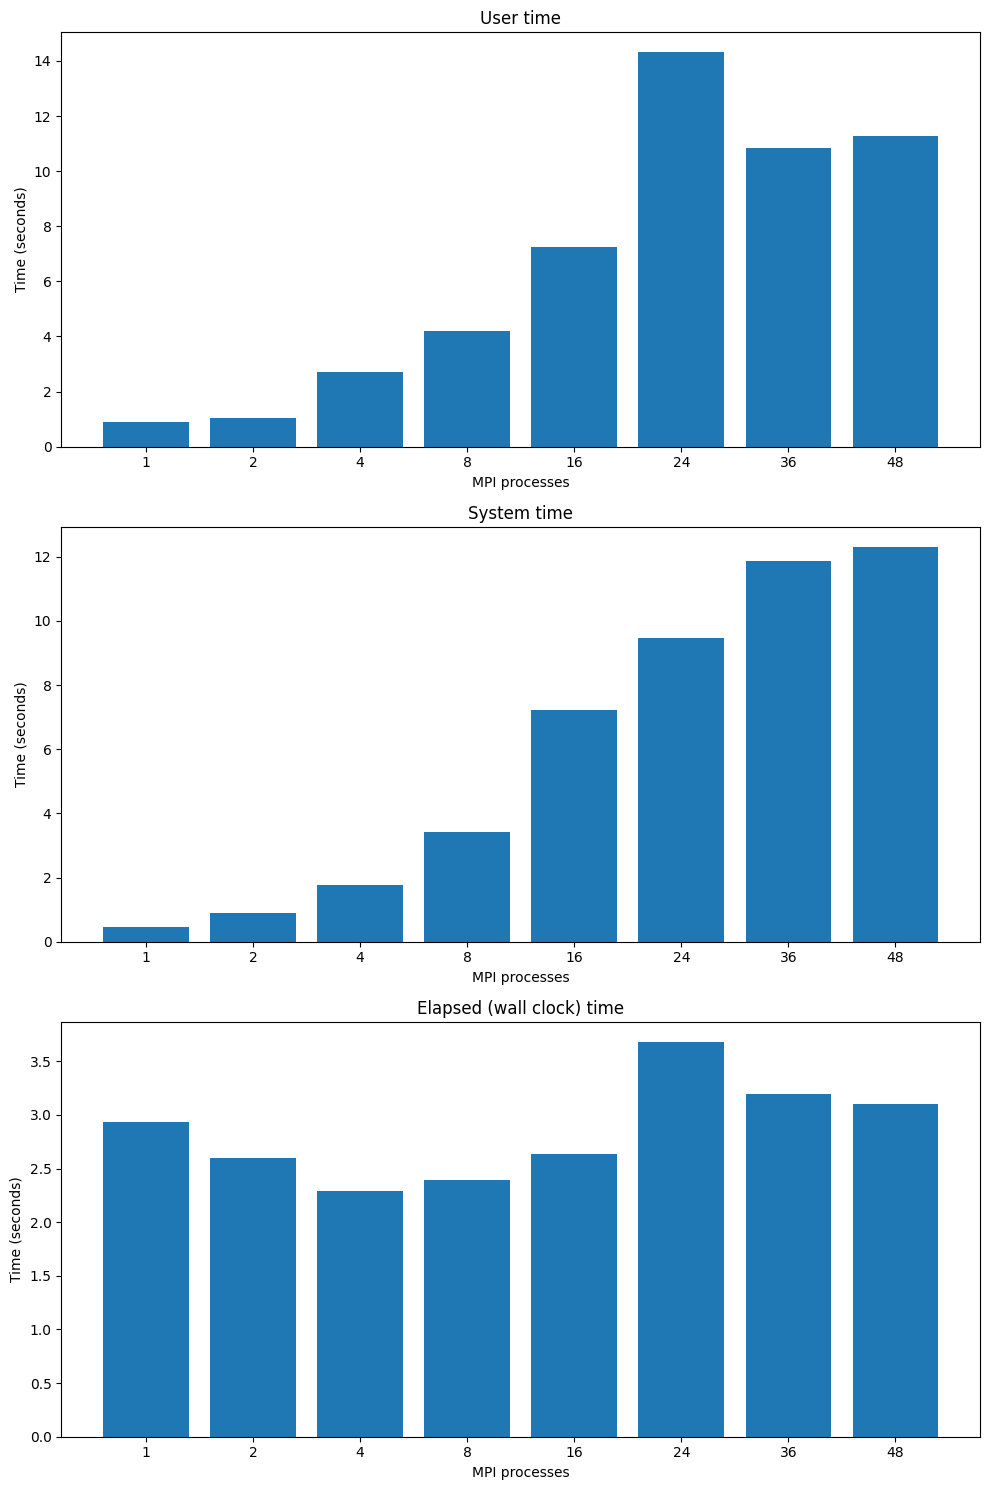

Plot saved to mandelbrot_scal_mpi.png


In [2]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['User time (seconds)'].mean(), data_2['User time (seconds)'].mean(), 
           data_4['User time (seconds)'].mean(), data_8['User time (seconds)'].mean(), 
           data_16['User time (seconds)'].mean(), data_24['User time (seconds)'].mean(), 
           data_36['User time (seconds)'].mean(), data_64['User time (seconds)'].mean()], 
          label='User time')
ax[0].set_title('User time')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Time (seconds)')

ax[1].bar(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['System time (seconds)'].mean(), data_2['System time (seconds)'].mean(), 
           data_4['System time (seconds)'].mean(), data_8['System time (seconds)'].mean(), 
           data_16['System time (seconds)'].mean(), data_24['System time (seconds)'].mean(), 
           data_36['System time (seconds)'].mean(), data_64['System time (seconds)'].mean()], 
          label='System time')
ax[1].set_title('System time')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Time (seconds)')

ax[2].bar(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_2['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_4['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_8['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_16['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_24['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_36['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_64['Elapsed (wall clock) time (hmmss or mss)'].mean()], 
          label='Elapsed (wall clock) time')
ax[2].set_title('Elapsed (wall clock) time')
ax[2].set_xlabel('MPI processes')
ax[2].set_ylabel('Time (seconds)')

plt.tight_layout()
# plt.savefig('mandelbrot_scal_mpi.png')
plt.show()

print('Plot saved to mandelbrot_scal_mpi.png')

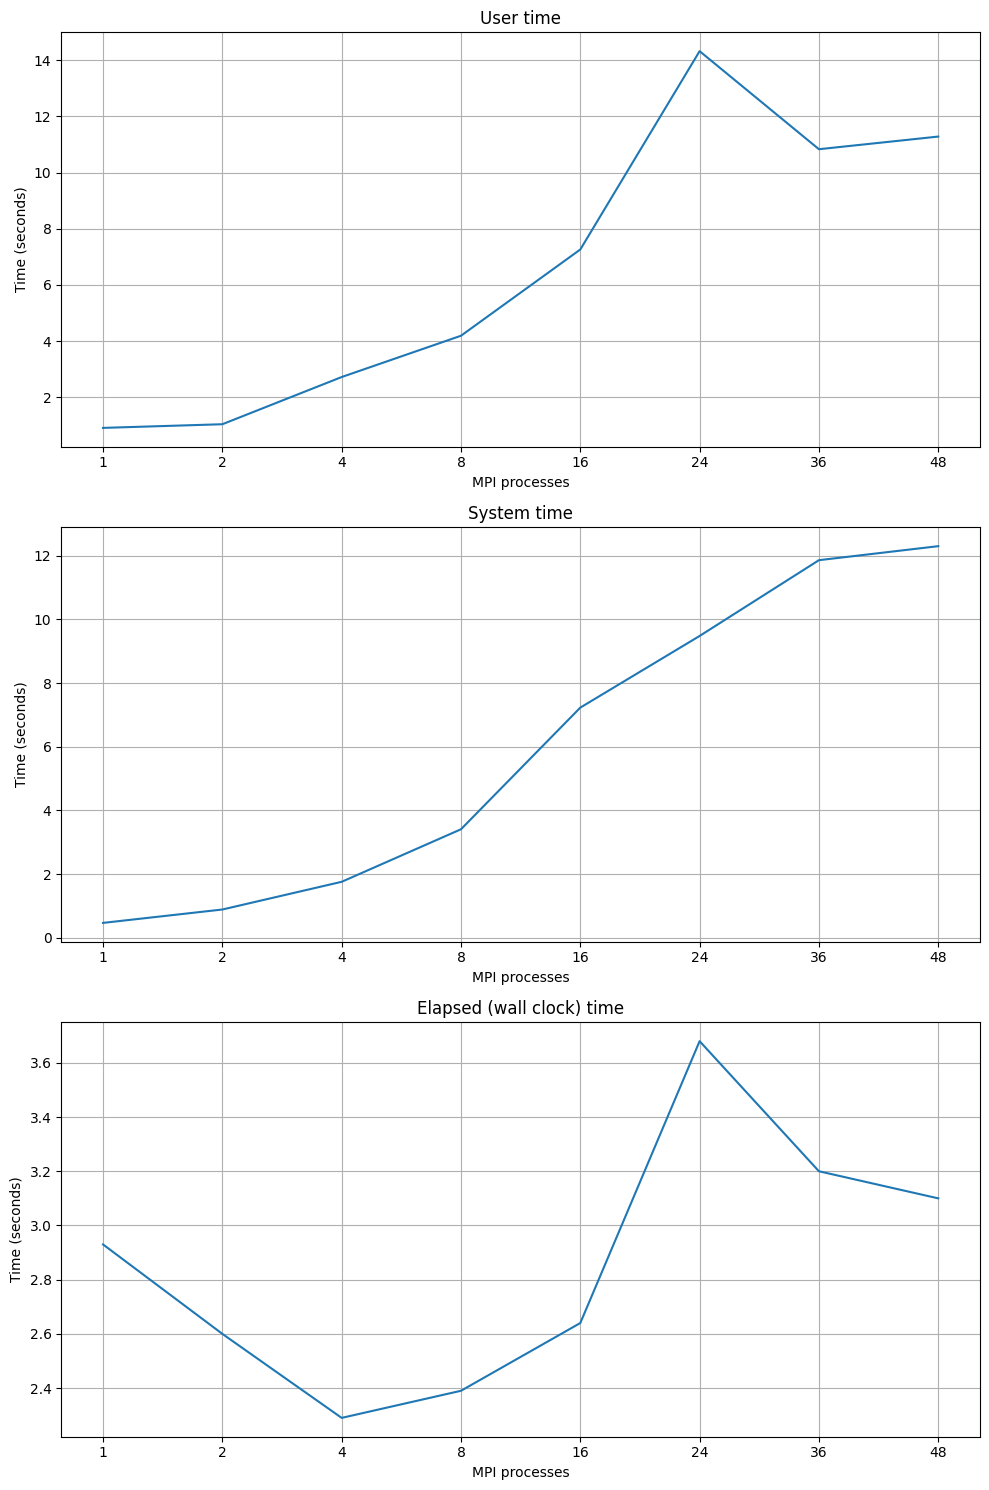

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['User time (seconds)'].mean(), data_2['User time (seconds)'].mean(), 
           data_4['User time (seconds)'].mean(), data_8['User time (seconds)'].mean(), 
           data_16['User time (seconds)'].mean(), data_24['User time (seconds)'].mean(), 
           data_36['User time (seconds)'].mean(), data_64['User time (seconds)'].mean()], 
          label='User time')
ax[0].set_title('User time')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Time (seconds)')
ax[0].grid(True)

ax[1].plot(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['System time (seconds)'].mean(), data_2['System time (seconds)'].mean(), 
           data_4['System time (seconds)'].mean(), data_8['System time (seconds)'].mean(), 
           data_16['System time (seconds)'].mean(), data_24['System time (seconds)'].mean(), 
           data_36['System time (seconds)'].mean(), data_64['System time (seconds)'].mean()], 
          label='System time')
ax[1].set_title('System time')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Time (seconds)')
ax[1].grid(True)

ax[2].plot(['1', '2', '4', '8', '16', '24', '36', '48'], 
          [data_1['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_2['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_4['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_8['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_16['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_24['Elapsed (wall clock) time (hmmss or mss)'].mean(), 
           data_36['Elapsed (wall clock) time (hmmss or mss)'].mean(), data_64['Elapsed (wall clock) time (hmmss or mss)'].mean()], 
          label='Elapsed (wall clock) time')
ax[2].set_title('Elapsed (wall clock) time')
ax[2].set_xlabel('MPI processes')
ax[2].set_ylabel('Time (seconds)')
ax[2].grid(True)

plt.tight_layout()
# plt.savefig('mandelbrot_scal_mpi.png')
plt.show()


### Data interpretation

1. **User Time**: User time' represents the time spent executing programme code in user mode, outside of the operating system's kernel functions. The curve shows an increase up to 16 processes, then a peak at 24 processes before decreasing and finally increasing again with 48 processes. The increase in user time to 16 processes may indicate that the addition of MPI processes does indeed contribute to the computational workload. However, the spike to 24 processes and subsequent decrease may suggest inefficiencies, possibly due to communication congestion or sub-optimal workload distribution. The subsequent rise to 48 processes may be attributed to the additional overhead in handling more processes that may not be balanced by a proportional gain in effective computing power.

2. **System Time**: System time' indicates the time spent executing system calls or kernel functions. The steady increase in system time with the increase in MPI processes suggests that there is an increasing system overhead, which may include handling communication between processes. The constant increase is an indicator that more processes result in higher communication or synchronisation costs at system level, which are not compensated for by a proportional increase in computing speed, leading to a decrease in overall efficiency.

3. **Elapsed (Wall Clock) Time**: This is the total elapsed time from start to finish of programme execution. The graph initially shows a decreasing trend up to 6 processes, indicating good scalability. However, the time increases sharply at 16 processes, then increases dramatically at 24 before dropping to 48. The trend in execution time shows that there are peaks of inefficiency, especially at 24 processes. This could be due to increased waiting time for resources or inefficient handling of inter-process communication. The decrease to 36 and then 48 processes suggests that there may be specific optimum points for process configuration for the particular problem and computing environment.

Overall, the scalability of the programme does not appear linear and shows signs of communication and system management overheads that affect overall efficiency as the number of processes increases. This could be due the nature of the problem, lack of load balancing between processes, congestion in the network or communications, or inefficient utilisation of system resources due to the configuration of the computing topology. 

## Bottlenecks

Here we will analyse the major page faults and involuntary context swithces for different configurations.


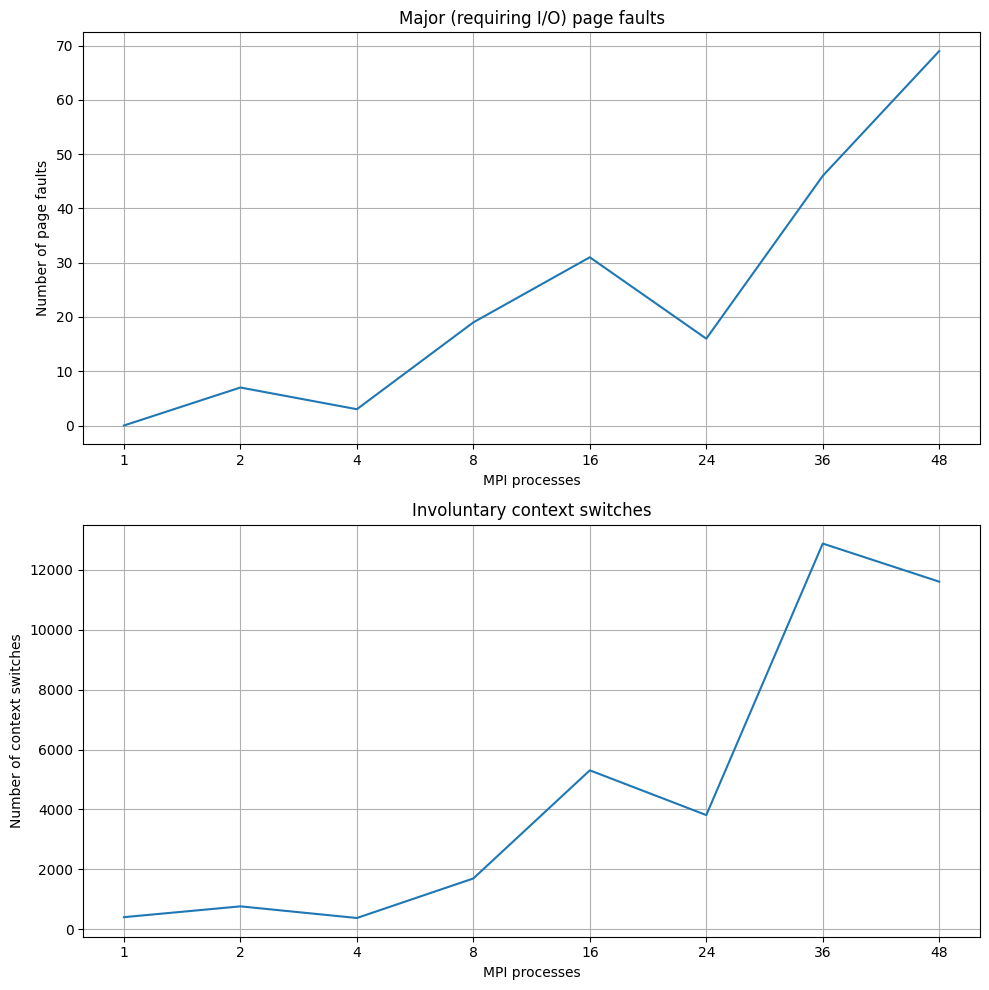

In [6]:
# plot the data for bottlenecks ("Major (requiring I/O) page faults", "Involuntary context switches")

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
              [data_1['Major (requiring I/O) page faults'].mean(), data_2['Major (requiring I/O) page faults'].mean(),
                data_4['Major (requiring I/O) page faults'].mean(), data_8['Major (requiring I/O) page faults'].mean(),
                data_16['Major (requiring I/O) page faults'].mean(), data_24['Major (requiring I/O) page faults'].mean(),
                data_36['Major (requiring I/O) page faults'].mean(), data_64['Major (requiring I/O) page faults'].mean()],
              label='Major (requiring I/O) page faults')
ax[0].set_title('Major (requiring I/O) page faults')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Number of page faults')
ax[0].grid(True)


ax[1].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
                [data_1['Involuntary context switches'].mean(), data_2['Involuntary context switches'].mean(),
                    data_4['Involuntary context switches'].mean(), data_8['Involuntary context switches'].mean(),
                    data_16['Involuntary context switches'].mean(), data_24['Involuntary context switches'].mean(),
                    data_36['Involuntary context switches'].mean(), data_64['Involuntary context switches'].mean()],
                label='Involuntary context switches')
ax[1].set_title('Involuntary context switches')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Number of context switches')
ax[1].grid(True)

plt.tight_layout()
# plt.savefig('mandelbrot_scal_mpi_bottlenecks.png')
# plt.grid(True)
plt.show()



### Data interpretation

1. **Major (requiring I/O) Page Faults**: Major page faults occur when the system has to read a page of memory from the disk because it is not present in RAM. This can happen if the process requires more memory than is physically available, forcing the system to swap pages between RAM and disk. The number of ‘Major page faults’ increases as the number of MPI processes increases, showing a significant peak at 16 processes, a decrease at 24, and then a further sharp increase to 48. This suggests that the system may be under memory pressure as the number of processes increases, forcing the operating system to resort to I/O operations that are significantly slower than memory operations. 

2. **Involuntary context switches**: An ‘Involuntary context switch’ occurs when a process is forced by the operating system to hand over the processor to another process. This generally happens when the current process is waiting for an I/O to finish or when another process with a higher priority needs to be executed. The number of ‘Involuntary context switches’ initially increases as the number of processes increases, shows a peak at 16 processes, then decreases to 24, and increases dramatically to 36 before decreasing again to 48. This indicates that there are potential inefficiencies in process management and CPU scheduling, especially with a large number of processes.

**Implication**: The increasing frequency of ‘major page faults’ suggests that it might be worth optimising memory usage within the programme. High ‘Involuntary context switches’ indicate that the workload may not be distributed efficiently among processes, or that the waiting time for resources (such as memory or I/O) is adversely affecting performance.

Possible solutions could include:

- Optimising memory usage: Examining how memory is used and allocated in your programme. Using techniques such as memory profiling may help identify where memory is being used inefficiently.

- Load balancing: Ensure that the workload is balanced evenly between processes to minimise waiting times and maximise effective CPU utilisation.

- System tuning: Adjusting system parameters such as I/O scheduling, memory management, or CPU scheduling to better accommodate the workload of the programme.



# Parallelization Impact

Here we will compare the increasing of the CPU percentage and the execution times for different configurations of MPI processes.

/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T/ipykernel_97283/1711653800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Percent of CPU this job got'] = df['Percent of CPU this job got'].str.rstrip('%').astype('float')
/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T/ipykernel_97283/1711653800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Percent of CPU this job got'] = df['Percent of CPU this job got'].str.rstrip('%').astype('float')
/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T/ipy

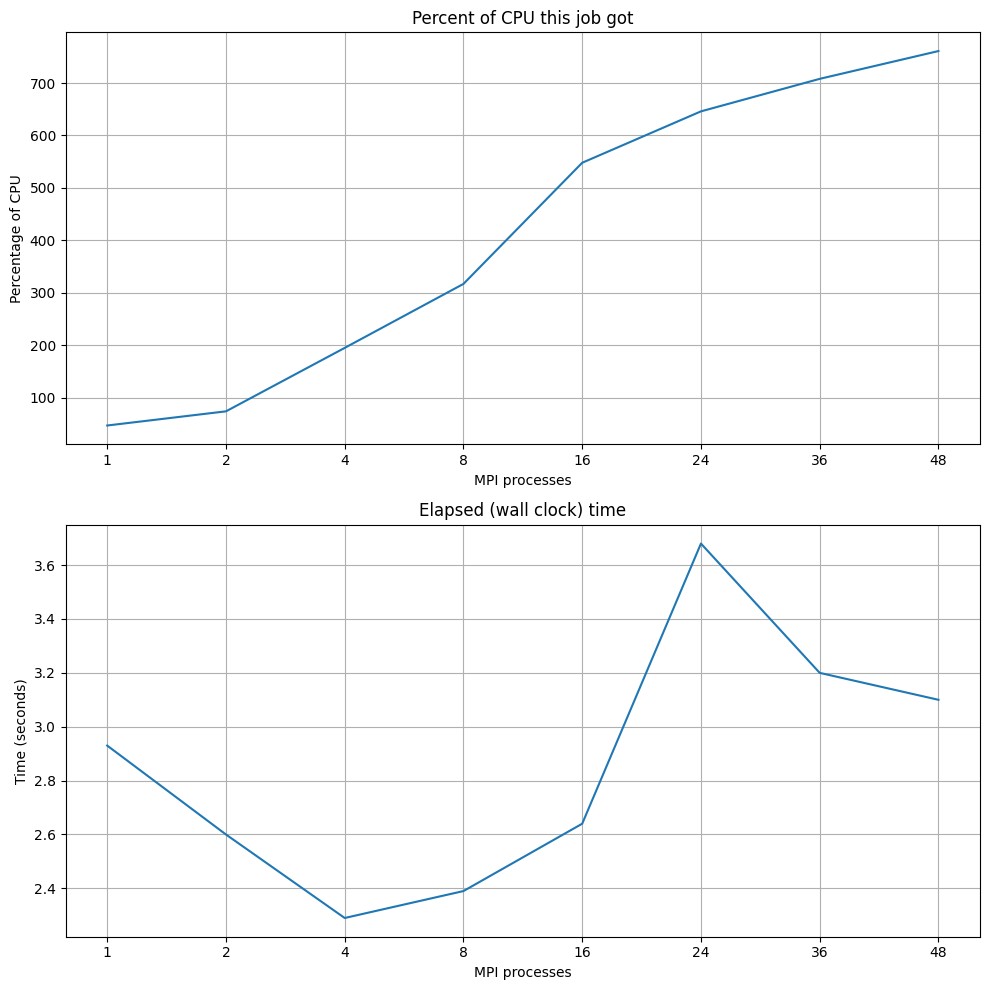

In [14]:
import matplotlib.pyplot as plt

# Convert 'Percent of CPU this job got' to numeric
dataframes = [data_1, data_2, data_4, data_8, data_16, data_24, data_36, data_64]
for df in dataframes:
    df['Percent of CPU this job got'] = df['Percent of CPU this job got'].str.rstrip('%').astype('float')

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
                [df['Percent of CPU this job got'].mean() for df in dataframes],
                label='Percent of CPU this job got')
ax[0].set_title('Percent of CPU this job got')
ax[0].set_xlabel('MPI processes')
ax[0].set_ylabel('Percentage of CPU')
ax[0].grid(True)    

ax[1].plot(['1', '2', '4', '8', '16', '24', '36', '48'],
                [df['Elapsed (wall clock) time (hmmss or mss)'].mean() for df in dataframes],
                label='Elapsed (wall clock) time')
ax[1].set_title('Elapsed (wall clock) time')
ax[1].set_xlabel('MPI processes')
ax[1].set_ylabel('Time (seconds)')
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Data interpretation

From the graphs concerning the impact of parallelisation, we can analyse two fundamental metrics: the ‘Percent of CPU this job got’ and the ‘Elapsed (wall clock) time’, which give us information on the scalability of the programme and how CPU utilisation and execution time vary with the number of MPI processes.

1. **Percent of CPU this job got**: This graph represents the percentage of CPU obtained by the process, a measure of how efficiently the computational work is distributed and utilised across multiple cores and processes. The percentage of CPU utilisation increases almost linearly with the increase in the number of MPI processes, indicating that the increase in processes leads to higher overall CPU utilisation. This is a positive sign suggesting good scalability in terms of the ability to handle parallel workloads. However, an increase above 100 per cent indicates that several cores are being used simultaneously, which is expected in a parallel environment such as MPI on a multicore system.

2. **Elapsed (Wall Clock) Time**: This graph shows the total elapsed time from the beginning to the end of programme execution, which is essential for assessing the effectiveness of parallelisation in terms of reducing execution time. The trend shows a significant improvement in execution time as the number of processes increases from 1 to 8, indicating that parallelisation is having a positive impact. However, there is an unexpected peak at 24 processes, followed by a drop to 36 before a reduction to 48. This erratic trend may indicate a number of problems:
    - Spikes: These may be caused by inefficiencies in communication between processes, overhead in memory management or synchronisation, which become more pronounced with a large number of processes.
    - Drop between peaks: This may indicate specific configurations of the number of processes that best suit the network topology or workload distribution.

The analysis suggests that the programme benefits from parallelisation up to a certain point, beyond which process management overhead and communication complexities may reduce the benefits of parallelisation.



# Summary 

From the analysis of MPI scalability data, we can draw several important conclusions regarding efficiency, bottlenecks and the impact of parallelisation in the programme. Here is a comprehensive summary:

1. **Efficiency**: 
    - User Time: The increase in user time to 16 processes suggests that the addition of processes contributes positively to the computational workload. However, the peak at 24 processes and subsequent decrease indicate inefficiencies potentially related to communication congestion or sub-optimal workload distribution.
    - System Time: The steady increase in system time reflects the increase in system overhead due to communication management between processes, indicating increasing synchronisation and communication costs at the system level.
    - Elapsed Time: Decreases up to 6 processes, then increases significantly to 16 processes, with peaks of inefficiency especially at 24 processes, which could be due to increased waiting time for resources or inefficient management of inter-process communication.

2. **Bottlenecks**:
    - Major Page Faults: Increasing with the number of processes, suggesting pressure on memory as processes increase, leading to significantly slower I/O operations than memory operations.
    - Involuntary Context Switches: The increase of involuntary context switches with increasing number of processes may indicate inefficiencies in process management and CPU scheduling, especially with a large number of processes.

3. **Parallelisation Impact**:
    - Percent of CPU: The almost linear increase in the percentage of CPU utilisation with increasing MPI processes indicates good scalability in terms of ability to handle parallel workloads, but also suggests that there may be a physical or saturation limit.
    - Elapsed Wall Clock Time: Shows significant improvements in execution up to 8 processes, indicating a positive impact of parallelisation. However, the unexpected peak at 24 processes followed by a reduction indicates limits in managing communication and synchronisation between a large number of processes.

Analyses indicate that the programme benefits from parallelisation up to a certain number of processes, beyond which gains are reduced due to management overhead and communication complexity. These results suggest that there are key areas that can be optimised to further improve performance, such as memory management, workload balancing, minimising communication overheads and synchronisation.

Possible improvements:
- Optimising Memory Management: Reduce major page faults by optimising memory usage within the programme.
- Load Balancing: Ensure that the workload is distributed equally between processes to minimise waiting times and maximise effective CPU utilisation.
- System Tuning: Adjust system parameters such as I/O scheduling, memory management or CPU scheduling to better suit the workload of the programme.

